In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [3]:
# read raw csv by marking missing values as NaN
missing_values = ['NIL', 'nil', '']
df = pd.read_csv(os.path.join('..', '..', 'Datasets', 'brri-datasets', 'pre-processed', 'brri-weather_preprocessed_regression.csv'), 
                     na_values=missing_values)

df.head()

,Month,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),Station_Barisal,Station_Gazipur,Station_Habiganj,Station_Rangpur
0,1,25.2,13.8,0.0,1.0,94.0,62.0,6.3,4.5,277.72,1,0,0,0
1,1,25.4,13.8,0.0,1.0,94.0,62.0,5.5,5.3,257.52,1,0,0,0
2,1,25.6,13.4,0.0,1.0,94.0,61.0,6.2,4.6,275.20,1,0,0,0
3,1,25.4,14.0,0.0,1.0,94.0,64.0,6.3,4.5,277.72,1,0,0,0
4,1,23.0,13.0,0.0,1.0,94.0,68.0,4.0,6.8,219.63,1,0,0,0


In [9]:
def rain_classifier(_df):
    """
    create a column 'Rainfall' with classification labels with margins,
        - rainfall==0 -> no rain -> 0
        - rainfall>0 && rainfal<=22 -> light to moderate rain -> 1
        - rainfall>22 -> heavy to very heavy rain -> 2
        
    and drop the 'Rainfall (mm)' regression column
    """
    
    df = _df.copy()
    
    rainfall_labels = []
    
    for rainfall in df['Rainfall (mm)']:
        if rainfall==0:
            rainfall_labels.append(0) # no rain
        elif rainfall>0 and rainfall<=22:
            rainfall_labels.append(1) # light to moderate
        elif rainfall>22:
            rainfall_labels.append(2) # heavy
        else:
            print(f'outside rainfall margins -> {rainfall}')
            
    # insert classification column
    df['Rainfall'] = rainfall_labels
    # drop regression column
    df.drop(columns=['Rainfall (mm)'], inplace=True)

    return df

In [12]:
df = rain_classifier(df)
df.sample(5)

,Month,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),Station_Barisal,Station_Gazipur,Station_Habiganj,Station_Rangpur,Rainfall
1296,7,32.8,26.8,2.000000,91.0,76.0,2.8,10.6,277.76,1,0,0,0,1
2376,7,33.2,26.4,7.000000,87.0,77.0,7.8,5.7,438.29,0,1,0,0,0
2142,11,32.2,19.4,4.000000,74.0,56.0,7.7,3.2,318.12,0,1,0,0,0
3749,3,30.6,19.8,3.000000,68.0,59.0,8.3,3.5,424.60,0,0,0,1,0
4648,3,31.5,18.4,2.346154,100.0,60.0,9.6,2.2,466.85,0,0,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month                             4744 non-null   int64  
 1   Max Temp. (degree Celcius)        4744 non-null   float64
 2   Min Temp. (degree Celcius)        4744 non-null   float64
 3   Actual Evaporation (mm)           4744 non-null   float64
 4   Relative Humidity (morning, %)    4744 non-null   float64
 5   Relative Humidity (afternoon, %)  4744 non-null   float64
 6   Sunshine (hour/day)               4744 non-null   float64
 7   Cloudy (hour/day)                 4744 non-null   float64
 8   Solar Radiation (cal/cm^2/day)    4744 non-null   float64
 9   Station_Barisal                   4744 non-null   int64  
 10  Station_Gazipur                   4744 non-null   int64  
 11  Station_Habiganj                  4744 non-null   int64  
 12  Statio

In [14]:
df['Rainfall'].value_counts()

0    3096
1    1260
2     388
Name: Rainfall, dtype: int64

In [15]:
def show_corr_heatmap(df):
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    plt.figure(figsize=(20, 10))

    corr_matrix = df.corr()

    # mask to hide the upper triangle of the symmetric corr-matrix
    # mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

    heatmap = sns.heatmap(

        # correlation matrix
        corr_matrix,

        # mask the top triangle of the matrix
        # mask=mask,

        # two-contrast color, different color for + -
        cmap="PiYG",

        # color map range
        vmin=-1, vmax=1,

        # show corr values in the cells
        annot=True
    )

    # set a title
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

    plt.show()

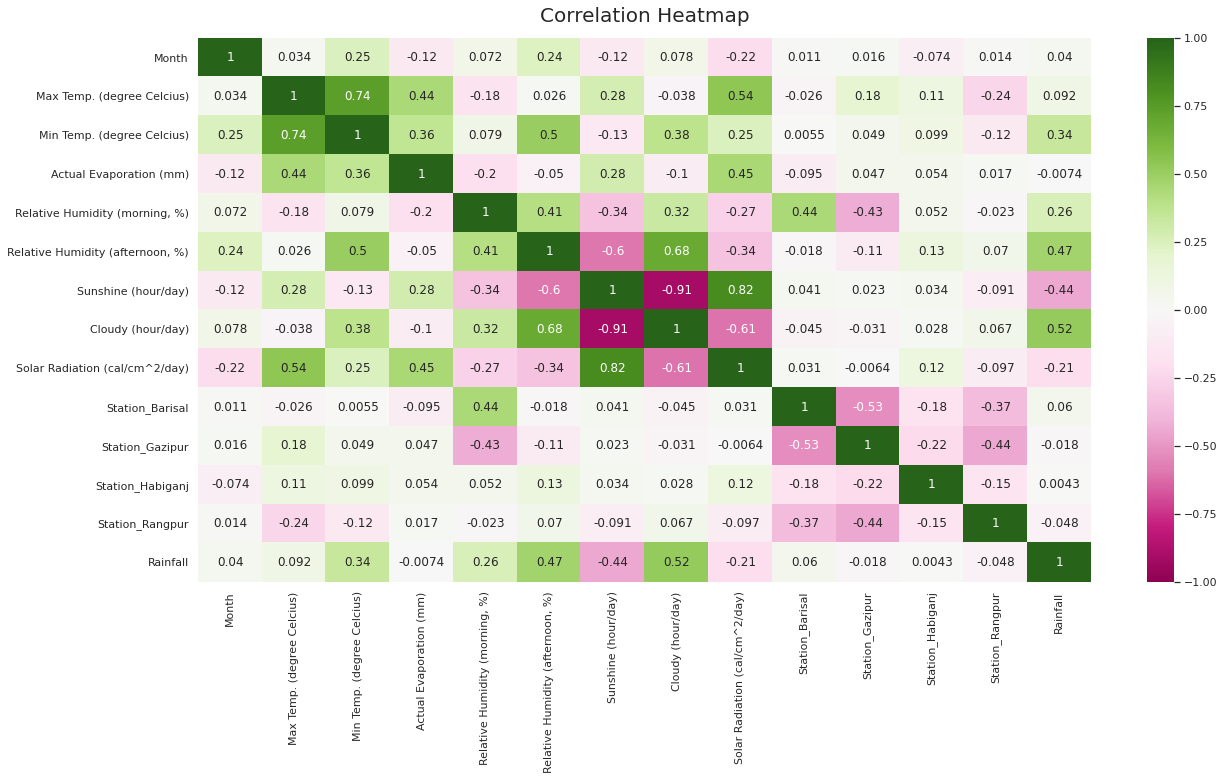

In [16]:
show_corr_heatmap(df)